In [1]:
from sklearn import datasets

In [2]:
ds = datasets.load_diabetes()

In [3]:
print(ds['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target, train_size=0.5)

In [18]:
X_train

array([[-0.06000263, -0.04464164,  0.04445121, ..., -0.03949338,
        -0.02712902, -0.00936191],
       [ 0.03081083,  0.05068012,  0.03259528, ...,  0.03430886,
         0.06301517,  0.00306441],
       [ 0.06713621,  0.05068012, -0.01482845, ...,  0.01290621,
        -0.00514219,  0.04862759],
       ...,
       [-0.00551455,  0.05068012, -0.01159501, ..., -0.00259226,
         0.01101066,  0.06933812],
       [-0.07090025, -0.04464164,  0.03906215, ..., -0.00259226,
         0.06773705, -0.01350402],
       [ 0.0090156 , -0.04464164, -0.02452876, ..., -0.00259226,
        -0.02139531,  0.00720652]])

In [6]:
from sklearn.tree import DecisionTreeRegressor

In [7]:
clf = DecisionTreeRegressor()

In [8]:
clf.fit(X_train, y_train)

DecisionTreeRegressor()

In [9]:
from sklearn.metrics import mean_squared_error

In [10]:
mean_squared_error(y_test, clf.predict(X_test))

6672.330316742082

In [11]:
mean_squared_error(y_train, clf.predict(X_train))

0.0

In [12]:
import numpy as np

In [13]:
res = np.zeros(X_test.shape[0])

In [14]:
N = 100

In [15]:
clf = DecisionTreeRegressor()

In [16]:
for i in range(N):
  ind = np.random.choice(np.arange(X_train.shape[0]),
                         size = X_train.shape[0],
                         replace=True)
  clf.fit(X_train[ind], y_train[ind])
  res += clf.predict(X_test)

In [17]:
mean_squared_error(y_test, res/N)

3382.540759728507

In [19]:
res = np.zeros(X_test.shape[0])

In [20]:
N = 100

In [21]:
clf = DecisionTreeRegressor()

In [22]:
for i in range(N):
  ind = np.random.choice(np.arange(X_train.shape[0]),
                         size = X_train.shape[0],
                         replace=True)
  ind_feat = np.random.choice(np.arange(X_test.shape[1]),
                         size = int(0.2*X_test.shape[1]))
  clf.fit(X_train[ind][:, ind_feat], y_train[ind])
  res += clf.predict(X_test[:, ind_feat])

In [23]:
mean_squared_error(y_test, res/N)

4077.3193053368013

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
clf = RandomForestRegressor(n_estimators=100, max_features=0.2)

In [26]:
clf.fit(X_train, y_train)

RandomForestRegressor(max_features=0.2)

In [27]:
mean_squared_error(y_test, clf.predict(X_test))

3215.582151131222

In [28]:
import matplotlib.pyplot as plt


In [29]:
Q = []

In [30]:
for n_est in range(1, 200, 2):
  clf = RandomForestRegressor(n_estimators=n_est, max_features=0.2)
  clf.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf.predict(X_test)))

Text(0, 0.5, 'MSE')

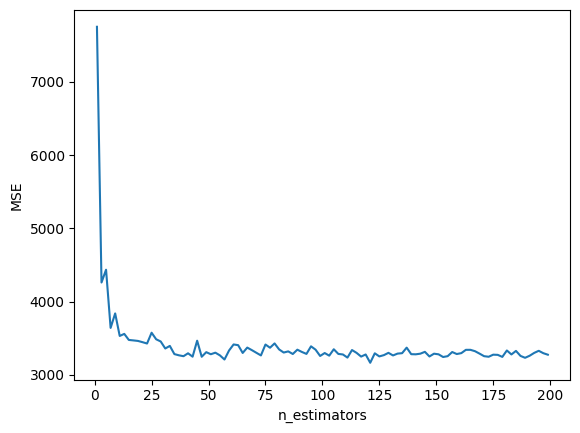

In [31]:
plt.plot(range(1, 200, 2), Q)
plt.xlabel('n_estimators')
plt.ylabel('MSE')

In [32]:
Q = []

In [33]:
for m_f in range(1, 11):
  clf = RandomForestRegressor(n_estimators=100, max_features=m_f)
  clf.fit(X_train, y_train)
  Q.append(mean_squared_error(y_test, clf.predict(X_test)))

Text(0, 0.5, 'MSE')

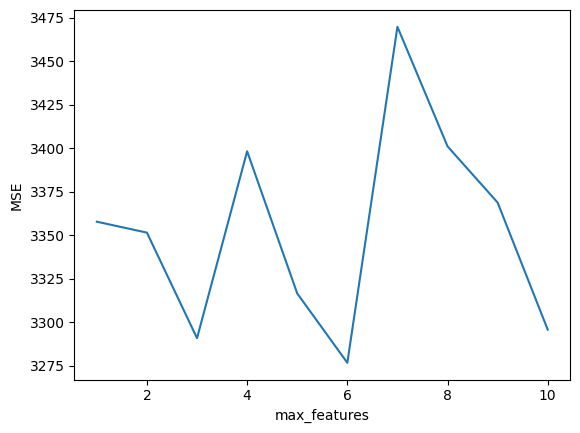

In [34]:
plt.plot(range(1, 11), Q)
plt.xlabel('max_features')
plt.ylabel('MSE')

In [35]:
clf = RandomForestRegressor(n_estimators=200, max_features=0.2)
clf.fit(X_train, y_train)
mean_squared_error(y_test,  clf.predict(X_test))

3306.336212330317

In [36]:
clf.feature_importances_

array([0.05976222, 0.01356032, 0.1803892 , 0.12836241, 0.06607027,
       0.0779303 , 0.12512043, 0.09389791, 0.18475843, 0.07014851])

In [37]:
import seaborn as sns
import pandas as pd

In [38]:
features_imp = pd.DataFrame({'importance': clf.feature_importances_,
                             'name': ds.feature_names})

<Axes: xlabel='importance', ylabel='name'>

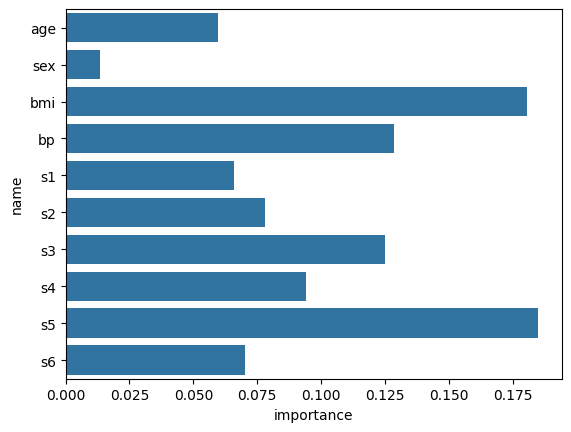

In [39]:
sns.barplot(x='importance', y='name', data=features_imp)

In [40]:
ds.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [41]:
ind = np.append(np.arange(2), np.arange(3, 10))
clf = RandomForestRegressor(n_estimators=200, max_features=0.2)
clf.fit(X_train[:, ind], y_train)

RandomForestRegressor(max_features=0.2, n_estimators=200)

In [42]:
mean_squared_error(y_test, clf.predict(X_test[:, ind]))

3693.2011593891402

In [43]:
ind = np.append(np.arange(1), np.arange(2, 10))
clf.fit(X_train[:, ind], y_train)
mean_squared_error(y_test, clf.predict(X_test[:, ind]))

3501.7897182126694

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(X_train, y_train)

LinearRegression()

In [47]:
mean_squared_error(y_test, lr.predict(X_test))

2932.7641478599658

In [48]:
clf = RandomForestRegressor()
clf.fit(X_train, y_train)

RandomForestRegressor()

In [49]:
min_mse = mean_squared_error(y_test, lr.predict(X_test))
for i in range(100):
  mse = mean_squared_error(y_test, (i*lr.predict(X_test) +\
                                    (100 - i)*clf.predict(X_test))/100.0)
  if mse < min_mse:
    min_mse = mse
    best_i = i

In [50]:
mean_squared_error(y_test, (best_i*lr.predict(X_test) + \
                            (100 - best_i)*clf.predict(X_test))/100.0)

2914.9492238438297